In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

<h3>Preparing imaga data generators for learning:</h3>

In [3]:
image_width = 64
image_height = 64
batch_size = 16
number_of_channels = 1

training_data_directory_path = "training_data"
validation_data_directory_path = "validation_data"

In [10]:
training_image_data_generator = ImageDataGenerator(
    rescale=1.0/255,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)
validation_image_data_generator = ImageDataGenerator(
    rescale=1.0/255
)

traning_data_generator = training_image_data_generator.flow_from_directory(
    training_data_directory_path,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    color_mode ="grayscale" # FIRST SOLUTION
)
validation_data_generator = validation_image_data_generator.flow_from_directory(
    validation_data_directory_path,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    color_mode ="grayscale" # FIRST SOLUTION
)

Found 300 images belonging to 5 classes.


Found 202 images belonging to 5 classes.


In [11]:
class_names = {value: key for key, value in traning_data_generator.class_indices.items()}

print("Classes: ")
for key, value in class_names.items():
    print(f"{key}: {value}")

Classes: 
0: circle
1: elipse
2: rectangle
3: square
4: triangle


<h3>Plotting the training images:</h3>

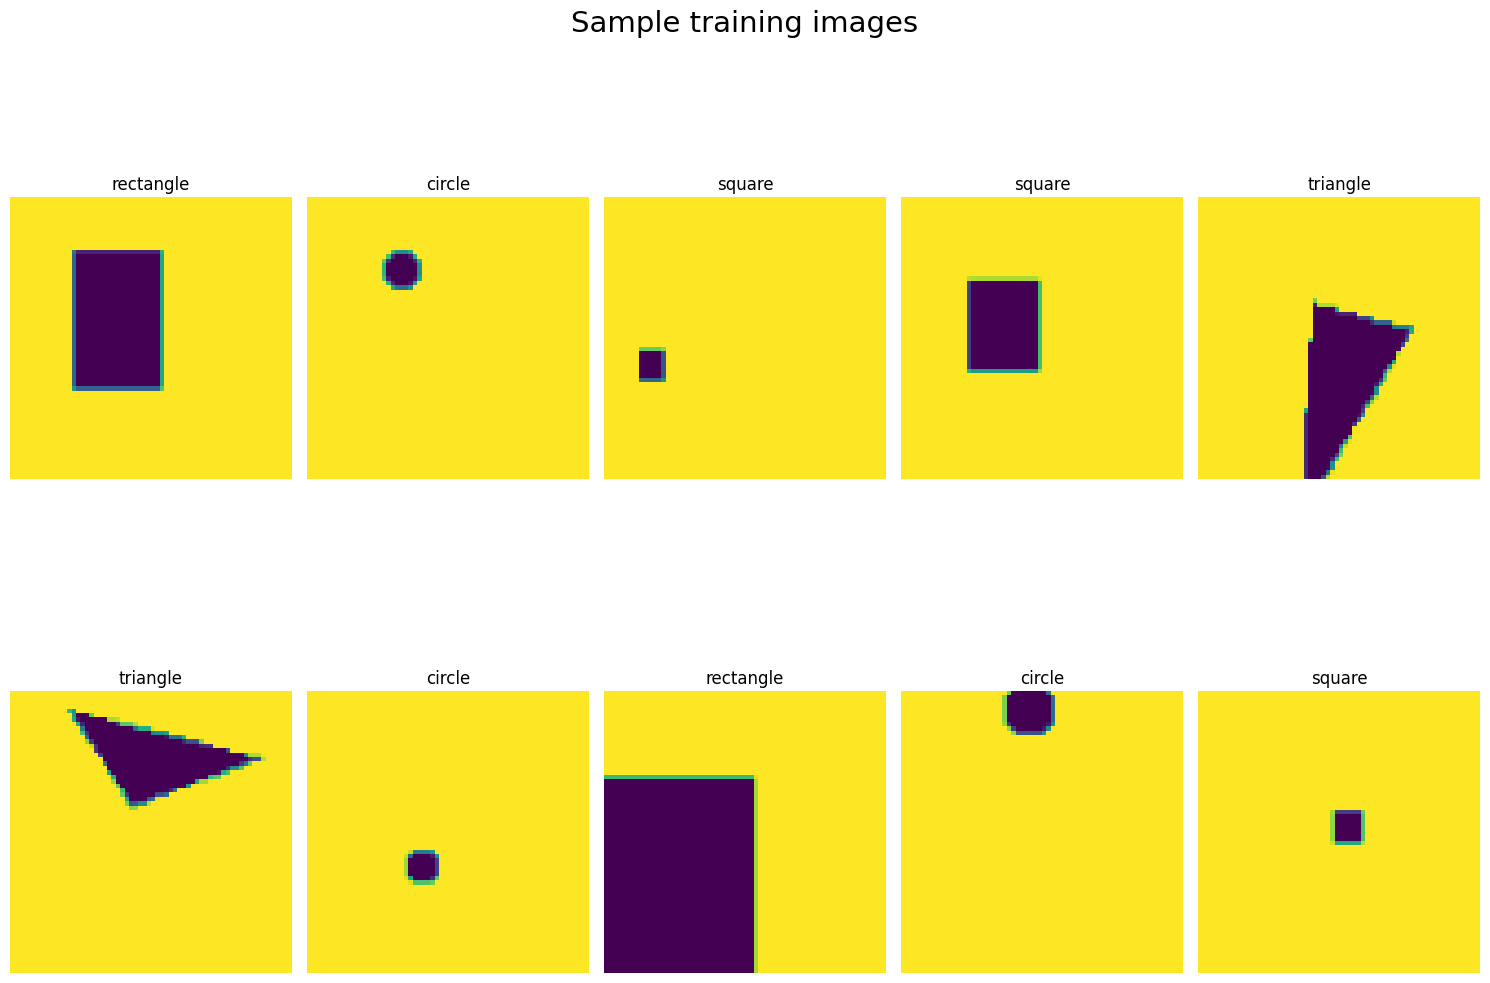

In [91]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx=0

for i in range(2):
    for j in range(5):
        class_name = class_names[np.argmax(traning_data_generator[0][1][idx])]
        ax[i, j].set_title(f"{class_name}")
        ax[i, j].imshow(traning_data_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx+=1
plt.tight_layout()
plt.suptitle("Sample training images", fontsize=21)
plt.show()

<h3>Implementing Convolutional Neural Network:</h3>

In [92]:
cnn_model = Sequential()

# FIRST LAYER
cnn_model.add(Convolution2D(
    filters=128,
    kernel_size=(5, 5),
    padding="valid",
    input_shape=(image_width, image_height, 1)
))
cnn_model.add(Activation(activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(BatchNormalization())

# SECOND LAYER
cnn_model.add(Convolution2D(
    filters=64,
    kernel_size=(3, 3),
    padding='valid',
    kernel_regularizer=l2(0.00005)
))
cnn_model.add(Activation(activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(BatchNormalization())

# THIRD LAYER
cnn_model.add(Convolution2D(
    filters=32,
    kernel_size=(3, 3),
    padding='valid',
    kernel_regularizer=l2(0.00005)
))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2))) 
cnn_model.add(BatchNormalization())

cnn_model.add(Flatten())
cnn_model.add(Dense(units=256, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(units=5, activation='softmax'))

In [93]:
cnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 60, 60, 128)       3328      
                                                                 
 activation_22 (Activation)  (None, 60, 60, 128)       0         
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 30, 30, 128)       0         
 ng2D)                                                           
                                                                 
 batch_normalization_18 (Ba  (None, 30, 30, 128)       512       
 tchNormalization)                                               
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 64)        73792     
                                                                 
 activation_23 (Activation)  (None, 28, 28, 64)       

In [94]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=np.sqrt(0.1),
    patience=5
)

optimizer = Adam(learning_rate=0.001)

cnn_model.compile(
    optimizer=optimizer,
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

<h3>Learning model</h3>

In [95]:
history = cnn_model.fit(
    traning_data_generator,
    epochs=150,
    verbose=2,
    validation_data=validation_data_generator,
    callbacks=[reduce_lr]
)

Epoch 1/150
19/19 - 3s - loss: 2.0683 - accuracy: 0.3600 - val_loss: 1.6947 - val_accuracy: 0.2000 - lr: 0.0010 - 3s/epoch - 174ms/step
Epoch 2/150
19/19 - 2s - loss: 1.7328 - accuracy: 0.4567 - val_loss: 2.0900 - val_accuracy: 0.2000 - lr: 0.0010 - 2s/epoch - 103ms/step
Epoch 3/150
19/19 - 2s - loss: 1.6282 - accuracy: 0.4533 - val_loss: 1.9820 - val_accuracy: 0.2000 - lr: 0.0010 - 2s/epoch - 102ms/step
Epoch 4/150
19/19 - 2s - loss: 1.3337 - accuracy: 0.5233 - val_loss: 2.0140 - val_accuracy: 0.2000 - lr: 0.0010 - 2s/epoch - 106ms/step
Epoch 5/150
19/19 - 2s - loss: 1.4208 - accuracy: 0.4900 - val_loss: 2.2970 - val_accuracy: 0.2000 - lr: 0.0010 - 2s/epoch - 102ms/step
Epoch 6/150
19/19 - 2s - loss: 1.1244 - accuracy: 0.5500 - val_loss: 2.3750 - val_accuracy: 0.2050 - lr: 0.0010 - 2s/epoch - 105ms/step
Epoch 7/150
19/19 - 2s - loss: 1.0352 - accuracy: 0.5767 - val_loss: 2.4605 - val_accuracy: 0.1950 - lr: 3.1623e-04 - 2s/epoch - 107ms/step
Epoch 8/150
19/19 - 2s - loss: 0.9097 - accu

<h3>Testing model:</h3>

In [96]:
testing_data_directory_path = validation_data_directory_path
testing_image_data_generator = ImageDataGenerator(
    rescale=1.0/255
)
testing_data_generator = testing_image_data_generator.flow_from_directory(
    testing_data_directory_path,
    target_size=(image_width, image_height),
    shuffle=False,
    batch_size=batch_size,
    class_mode="categorical",
    color_mode ="grayscale" # FIRST SOLUTION
)

Found 200 images belonging to 5 classes.


In [97]:
predictions = cnn_model.predict(
    testing_data_generator
)

13/13 [==============================] - 0s 22ms/step


In [98]:
test_loss, test_accuracy = cnn_model.evaluate(
    testing_data_generator, batch_size=batch_size
)

print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

13/13 [==============================] - 0s 23ms/step - loss: 0.4844 - accuracy: 0.7850
Test loss: 0.4843619167804718
Test accuracy: 0.7850000262260437


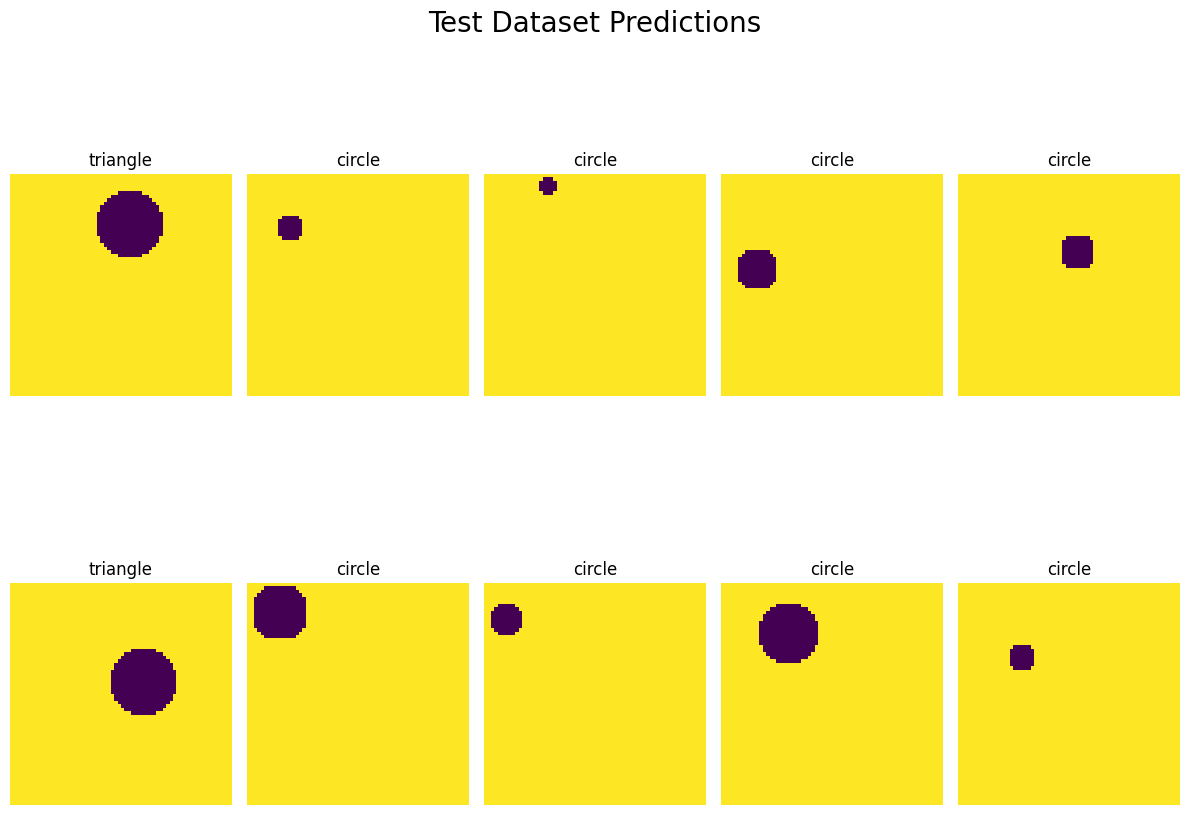

In [99]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = class_names[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(testing_data_generator[0][0][idx])
        ax[i, j].axis("off")
        idx+=1
        
plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

<h3>Saving model:</h3>

In [6]:
cnn_model.save_weights("primitives_cnn_model_weights.h5")
cnn_model.save("primitives_cnn_model.keras")

<h3>Loading and testing model:</h3>

1/1 [==============================] - 0s 114ms/step
Object: square


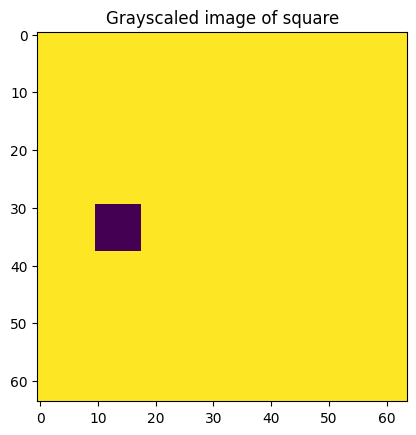

1/1 [==============================] - 0s 21ms/step
[[0.7259388  0.03068426 0.00409908 0.08147756 0.15780035]]
0.7259388
Object: circle


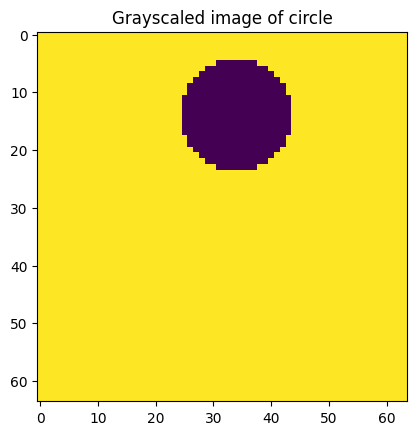

In [13]:
from keras.models import load_model
from keras.preprocessing.image import load_img

# Loading CNN model.
cnn_model = load_model("primitives_cnn_model.keras")

# Loading square
image = load_img("./validation_data/square/square-bad.png", target_size=(64, 64), color_mode="grayscale")
img = np.array(image)
img = img/255.0
img = img.reshape(1, 64, 64, number_of_channels)

output_label = cnn_model.predict(img)
print(f"Object: {class_names[np.argmax(output_label)]}")
plt.imshow(image)
plt.title("Grayscaled image of square")
plt.show()

# Loading square
image = load_img("./validation_data/circle/circle-bad.png", target_size=(64, 64), color_mode="grayscale")
img = np.array(image)
img = img/255.0
img = img.reshape(1, 64, 64, number_of_channels)

output_label = cnn_model.predict(img)
print(output_label)
print(np.max(output_label))
print(f"Object: {class_names[np.argmax(output_label)]}")
plt.imshow(image)
plt.title("Grayscaled image of circle")
plt.show()